29


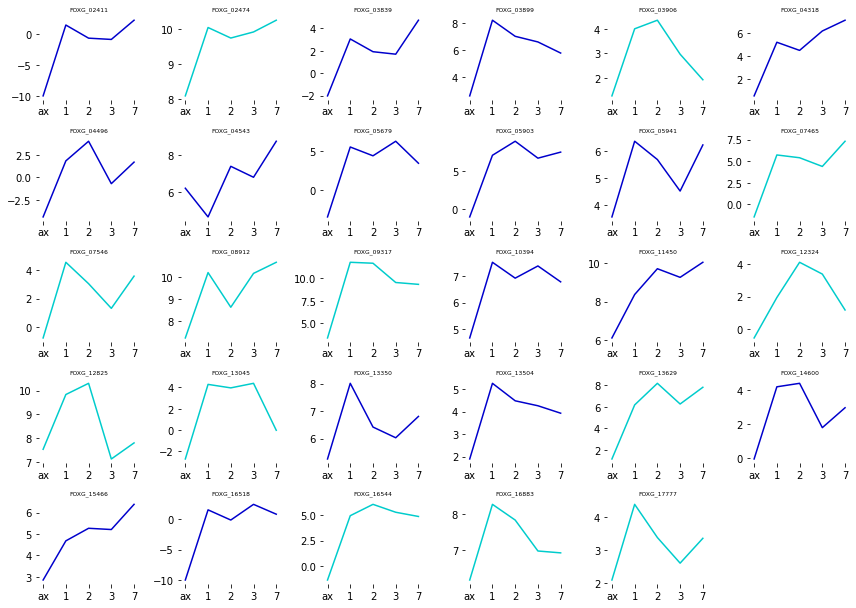

In [6]:
%matplotlib inline
import csv
import math

import matplotlib.pyplot as plt

GENES = "/Users/cschu/Documents/amey/foxy/results_2021/FOXY/genes/aa_transport_genes.expression.txt"
GENES2 = "/Users/cschu/Documents/amey/foxy/results_2021/FOXY/genes/hydrolase_genes.expression.txt"

aatransport = {"gene-FOXG_00434","gene-FOXG_02459","gene-FOXG_02474","gene-FOXG_02528","gene-FOXG_03476","gene-FOXG_03906","gene-FOXG_05007","gene-FOXG_05614","gene-FOXG_05628","gene-FOXG_07465","gene-FOXG_07546","gene-FOXG_08912","gene-FOXG_09114","gene-FOXG_09317","gene-FOXG_09412","gene-FOXG_09951","gene-FOXG_10162","gene-FOXG_10890","gene-FOXG_11029","gene-FOXG_11678","gene-FOXG_12324","gene-FOXG_12825","gene-FOXG_12825","gene-FOXG_13045","gene-FOXG_13296","gene-FOXG_13629","gene-FOXG_16544","gene-FOXG_16883","gene-FOXG_16899","gene-FOXG_17777"}
aatm = {"gene-FOXG_01274","gene-FOXG_02411","gene-FOXG_02459","gene-FOXG_02474","gene-FOXG_02474","gene-FOXG_02528","gene-FOXG_02610","gene-FOXG_02619","gene-FOXG_02784","gene-FOXG_02876","gene-FOXG_03476","gene-FOXG_03828","gene-FOXG_03839","gene-FOXG_03899","gene-FOXG_03906","gene-FOXG_04318","gene-FOXG_04485","gene-FOXG_04496","gene-FOXG_04543","gene-FOXG_04551","gene-FOXG_05007","gene-FOXG_05586","gene-FOXG_05614","gene-FOXG_05628","gene-FOXG_05645","gene-FOXG_05679","gene-FOXG_05724","gene-FOXG_05812","gene-FOXG_05903","gene-FOXG_05941","gene-FOXG_06563","gene-FOXG_06699","gene-FOXG_07263","gene-FOXG_07465","gene-FOXG_07530","gene-FOXG_07546","gene-FOXG_07840","gene-FOXG_08894","gene-FOXG_08912","gene-FOXG_08912","gene-FOXG_08962","gene-FOXG_09114","gene-FOXG_09317","gene-FOXG_09859","gene-FOXG_10018","gene-FOXG_10162","gene-FOXG_10179","gene-FOXG_10394","gene-FOXG_10823","gene-FOXG_10890","gene-FOXG_10901","gene-FOXG_11029","gene-FOXG_11450","gene-FOXG_11788","gene-FOXG_12005","gene-FOXG_12112","gene-FOXG_12183","gene-FOXG_12324","gene-FOXG_12338","gene-FOXG_12825","gene-FOXG_12826","gene-FOXG_13045","gene-FOXG_13055","gene-FOXG_13110","gene-FOXG_13205","gene-FOXG_13296","gene-FOXG_13350","gene-FOXG_13493","gene-FOXG_13504","gene-FOXG_13629","gene-FOXG_14600","gene-FOXG_15391","gene-FOXG_15438","gene-FOXG_15466","gene-FOXG_15615","gene-FOXG_15791","gene-FOXG_16071","gene-FOXG_16518","gene-FOXG_16544","gene-FOXG_16883","gene-FOXG_16899","gene-FOXG_16899","gene-FOXG_16934","gene-FOXG_16957","gene-FOXG_17218","gene-FOXG_17413","gene-FOXG_17529","gene-FOXG_17634","gene-FOXG_17777","gene-FOXG_19087","gene-FOXG_20256","gene-FOXG_20695","gene-FOXG_21877"}
"""
TreatmentTime_trt7_vs_ctrl.filtered.up.csv	"675"	"gene-FOXG_00102"	128.580364919274	3.55964311719312	0.384815155905249	9.25026746625747	2.23931609474407e-20	4.33962871634773e-19	67.1629225365044	34.1526891701374	35.59006088796	89.198415749166	77.9221438237089	34.8619657626961	88.4239790913929	51.7276907627671	76.8317438978123	364.445826464461	387.99579293186	425.446797826294	44.0787228343588	22.2863571307127
"""
genes = dict()

fig = plt.figure(figsize=(12, 10))

for row in csv.reader(open(GENES), delimiter="\t"):
    gene, counts = row[2], list(map(float, row[9:]))
    genes[gene] = [
        sum(counts[12:]) / 2,
        sum(counts[:3]) / 3,
        sum(counts[3:6]) / 3,
        sum(counts[6:9]) / 3,
        sum(counts[9:12]) / 3
    ]
    #break
print(len(genes))

for i, (gid, counts) in enumerate(sorted(genes.items()), start=1):
    splt = fig.add_subplot(6, 6, i)
    
    if gid in aatransport:
        if gid in aatm:
            color = "#00cccc"
        else:
            color = "#00cc00"
    else:
        color = "#0000cc"   
    
    splt.plot(['axenic', '1dpi', '2dpi', '3dpi', '7dpi'], 
              #counts, label=gid)
              [math.log(c + 0.001, 2) for c in counts], c=color, label=gid)
    
    
    
    splt.set_title(gid.split("-")[1], fontsize=6)
    #fig.suptitle('test title', fontsize=20)
    splt.spines["top"].set_visible(False)
    splt.spines["left"].set_visible(False)
    splt.spines["right"].set_visible(False)
    #splt.yaxis.set_visible(False)
    splt.xaxis.set_visible(True)
    #splt.set_xticks([])
    splt.spines["top"].set_visible(False)
    splt.spines["left"].set_visible(False)
    splt.spines["right"].set_visible(False)
    splt.spines["bottom"].set_visible(False)
    
    splt.set_xticks(range(5))
    ticklabels = ["ax", "1", "2", "3", "7"]
    splt.set_xticklabels(ticklabels)
    
    #splt.legend()

fig.tight_layout()  
#    plt.plot(['axenic', '1dpi', '2dpi', '3dpi', '7dpi'],
#             [math.log(c + 0.001, 2) for c in counts], label=gid)

#plt.legend()
#plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)

plt.savefig("/Users/cschu/Documents/amey/foxy/aa_transport_genes_may2021.pdf", dpi=300, format="pdf")
#plt.savefig("/Users/cschu/Documents/amey/foxy/hydrolase_genes.pdf", dpi=300, format="pdf")

